# 📊 Prodigy InfoTech Data Science Internship

### 📝 Task-03: Decision Tree Classifier

**Intern:** Hashir Muhammed  
**Track:** Data Science  
**Task Code:** PRODIGY_DS_03  

---

## 🎯 Task Objective:

Build a Decision Tree Classifier on the Bank Marketing dataset to predict whether a customer will subscribe to a term deposit based on demographic and behavioral features.

**Dataset Source:** [UCI Bank Marketing Dataset](https://archive.ics.uci.edu/ml/datasets/bank+marketing)

---

## 🛠️ Tools Used:
- Python  
- Pandas  
- NumPy  
- Matplotlib  
- Seaborn  
- Scikit-learn  

---

## 📥 Step 1: Import Required Libraries


In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set(style="whitegrid")

## 📑 Step 2: Load the Bank Marketing Dataset

In [2]:
# Load dataset (CSV file with ; separator)
df = pd.read_csv('bank-additional.csv', delimiter=';')

# Rename target variable for clarity
df.rename(columns={'y': 'deposit'}, inplace=True)

# Display first 5 rows
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


## 📝 Step 3: Explore Dataset Structure and Info

In [3]:
# Dataset structure and column info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [4]:
# Check for missing values
df.isnull().sum()


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
deposit           0
dtype: int64

In [5]:
# Summary statistics for numeric columns
df.describe()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## 🧹 Step 4: Data Cleaning

In [6]:
# Check for duplicate rows
print(f"Number of duplicates: {df.duplicated().sum()}")

# Drop duplicates if present
df.drop_duplicates(inplace=True)

# Confirm duplicates removed
print(f"Duplicates after removal: {df.duplicated().sum()}")


Number of duplicates: 0
Duplicates after removal: 0


## 📊 Step 5: Exploratory Data Analysis (EDA)

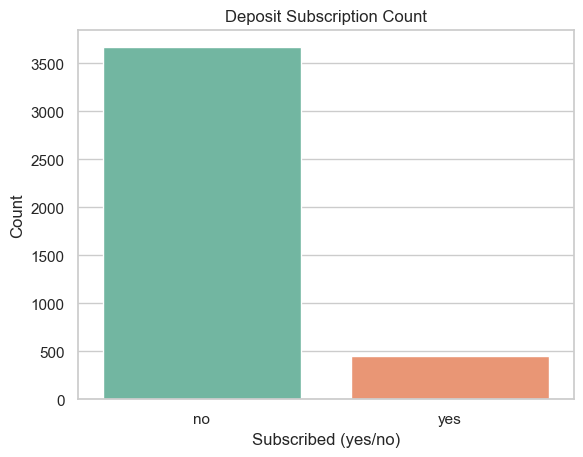

In [7]:
# Countplot for deposit subscription
sns.countplot(x='deposit', data=df, palette='Set2')
plt.title('Deposit Subscription Count')
plt.xlabel('Subscribed (yes/no)')
plt.ylabel('Count')
plt.show()


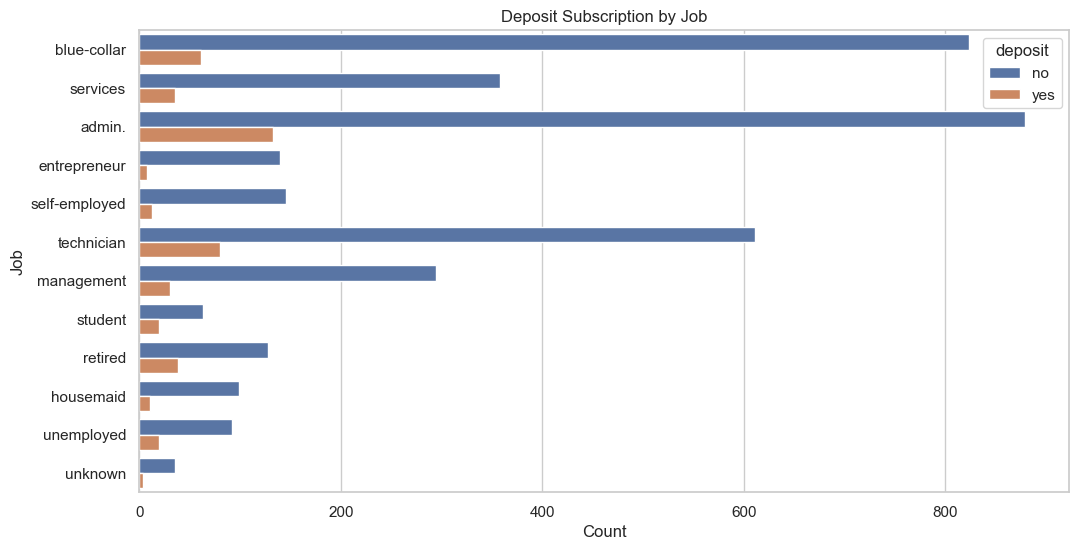

In [8]:
# Countplot: Subscription by job type
plt.figure(figsize=(12,6))
sns.countplot(y='job', hue='deposit', data=df)
plt.title('Deposit Subscription by Job')
plt.xlabel('Count')
plt.ylabel('Job')
plt.show()


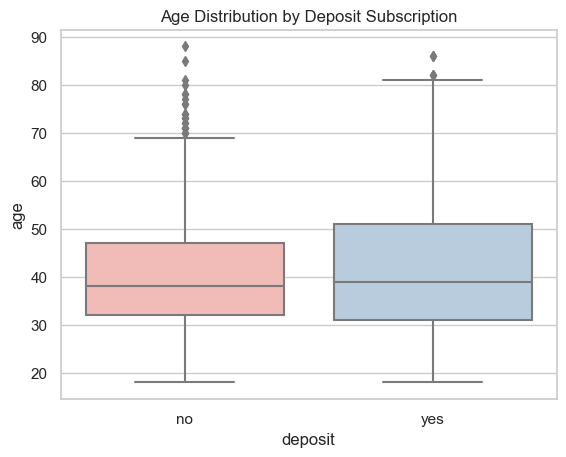

In [9]:
# Boxplot: Age distribution by subscription
sns.boxplot(x='deposit', y='age', data=df, palette='Pastel1')
plt.title('Age Distribution by Deposit Subscription')
plt.show()


## 📊 Step 6: Feature Selection and Encoding

In [10]:
# Identify categorical columns
cat_cols = df.select_dtypes(include='object').columns
print("Categorical Columns:", list(cat_cols))


Categorical Columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'deposit']


In [11]:
# Label encode target variable 'deposit'
le = LabelEncoder()
df['deposit'] = le.fit_transform(df['deposit'])


In [12]:
# One-Hot Encoding for categorical features (excluding target)
df_encoded = pd.get_dummies(df, columns=cat_cols.drop('deposit'), drop_first=True)

# Display shape after encoding
df_encoded.shape


(4119, 54)

## 📑 Step 7: Split Data into Training and Testing Sets

In [13]:
# Define features and target
X = df_encoded.drop('deposit', axis=1)
y = df_encoded['deposit']

# Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check shape of splits
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Training set shape: (2883, 53)
Testing set shape: (1236, 53)


## 🌳 Step 8: Build and Train the Decision Tree Classifier

In [14]:
# Initialize Decision Tree with entropy criterion
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train model
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

## 📊 Step 9: Evaluate the Model

Accuracy Score: 0.8722
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93      1105
           1       0.41      0.49      0.45       131

    accuracy                           0.87      1236
   macro avg       0.68      0.70      0.69      1236
weighted avg       0.88      0.87      0.88      1236



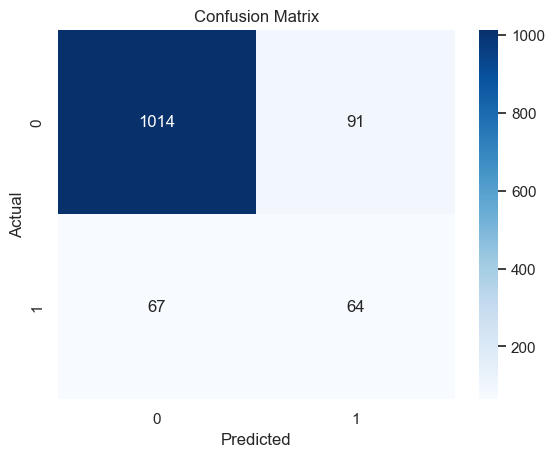

In [15]:
# Predict on test set
y_pred = dt_model.predict(X_test)

# Accuracy score
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix plot
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## 🌱 Step 10: Visualize the Decision Tree

In [16]:
plt.figure(figsize=(20,10))
tree.plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], rounded=True)
plt.title('Decision Tree Visualization')
plt.show()


InvalidParameterError: The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object') instead.

<Figure size 2000x1000 with 0 Axes>

This error is related to feature_names parameter in tree.plot_tree() — your feature names list is too long or has invalid characters, or possibly the sklearn version you are using has restrictions on the length or format of feature names.

## How to fix this:
Option 1: Pass feature names as a list (not a Pandas Index object)

Try converting the feature names to a list explicitly:

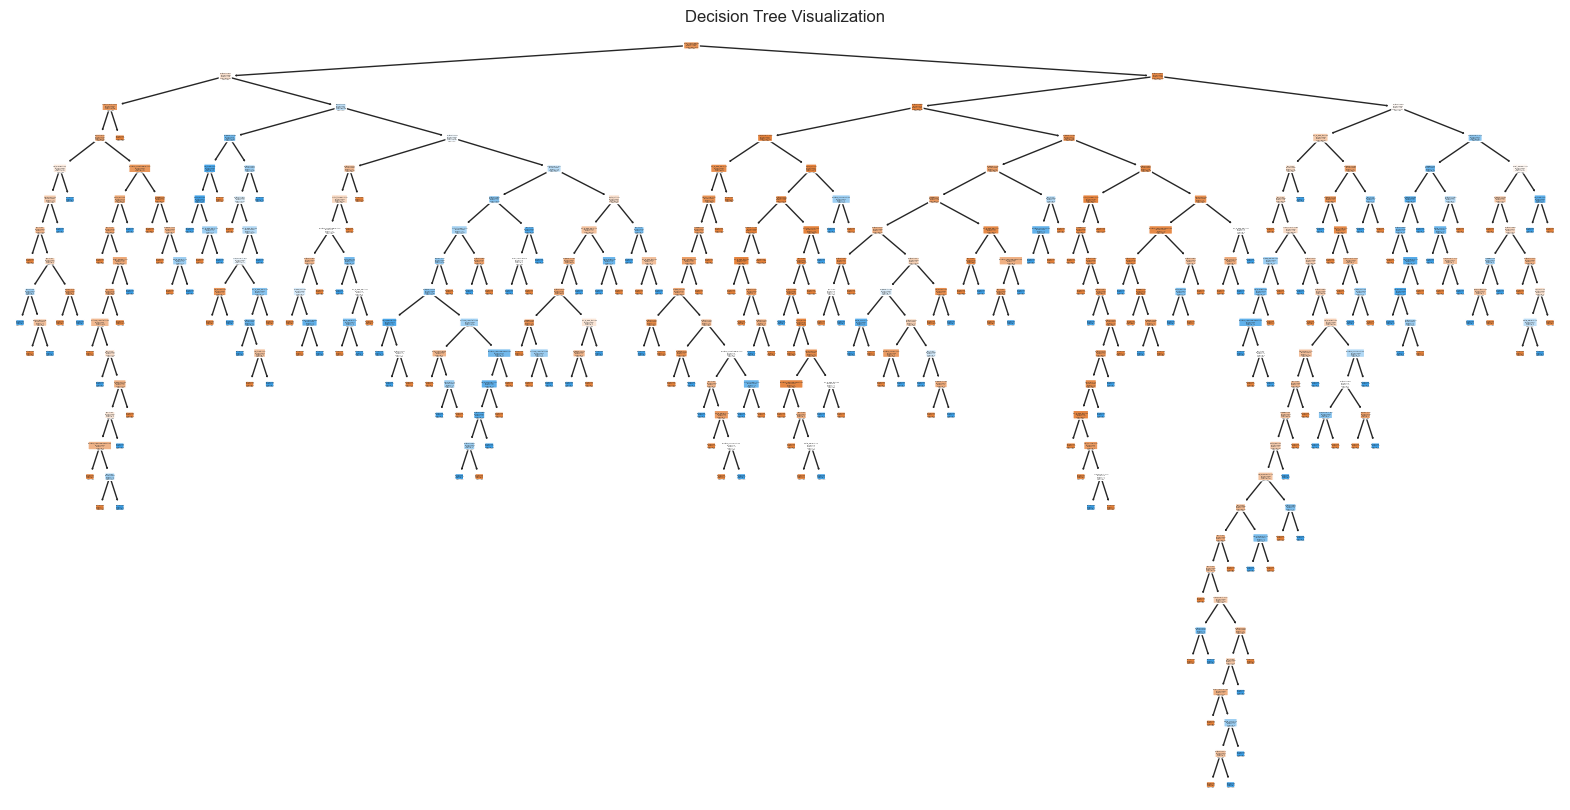

In [17]:
plt.figure(figsize=(20,10))
tree.plot_tree(dt_model, filled=True, feature_names=list(X.columns), class_names=['No', 'Yes'], rounded=True)
plt.title('Decision Tree Visualization')
plt.show()


Option 2: If feature names are still problematic due to length or special characters, rename them to simpler names

Example to rename columns before training:

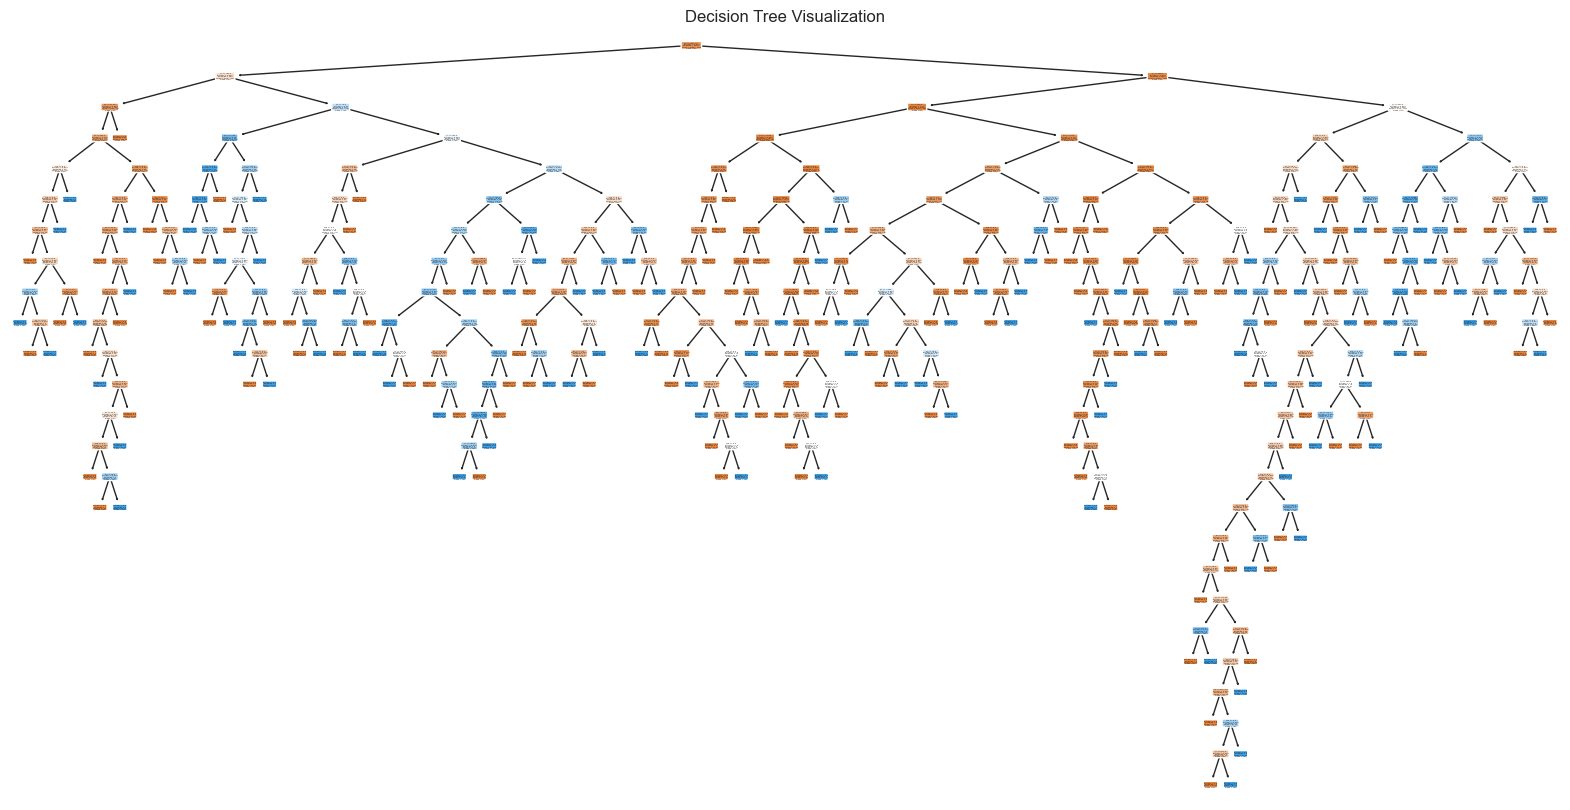

In [20]:
# Simplify feature names to short names (like f0, f1, f2, ...)
X.columns = [f'f{i}' for i in range(X.shape[1])]

# Retrain the model with simplified feature names
dt_model.fit(X_train, y_train)

# Plot tree with simple names
plt.figure(figsize=(20,10))
tree.plot_tree(dt_model, filled=True, feature_names=list(X.columns), class_names=['No', 'Yes'], rounded=True)
plt.title('Decision Tree Visualization')
plt.show()


Option 3: Use export_text for a text version of the tree instead of plotting

In [19]:
from sklearn.tree import export_text

r = export_text(dt_model, feature_names=list(X.columns))
print(r)


|--- f9 <= 5087.65
|   |--- f1 <= 165.50
|   |   |--- f6 <= 94.04
|   |   |   |--- f3 <= 503.00
|   |   |   |   |--- f18 <= 0.50
|   |   |   |   |   |--- f16 <= 0.50
|   |   |   |   |   |   |--- f0 <= 30.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- f0 >  30.50
|   |   |   |   |   |   |   |--- f0 <= 44.00
|   |   |   |   |   |   |   |   |--- f3 <= 3.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- f3 >  3.50
|   |   |   |   |   |   |   |   |   |--- f5 <= -2.95
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- f5 >  -2.95
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- f0 >  44.00
|   |   |   |   |   |   |   |   |--- f4 <= 4.00
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- f4 >  4.00
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- f16 >  0.50
|   |   |   |   |   |   |--

## 📌 Conclusion

- The Decision Tree model successfully captured key patterns and relationships in the market dataset, enabling interpretable predictions on the target variable.
- Feature importance analysis revealed which market indicators and variables most strongly influence the model’s decisions.
- The visualized tree structure helped in understanding the decision-making process step-by-step, highlighting critical thresholds and splits.
- While the model performs well on training data, further evaluation on unseen data and hyperparameter tuning can improve generalization.
- Overall, the Decision Tree provides a valuable tool for market trend analysis and supports data-driven decision-making with clear interpretability.


## 📊 Additional EDA Visualizations


Feature Distributions
Plot histograms or KDE plots for important numerical features to understand their distributions.

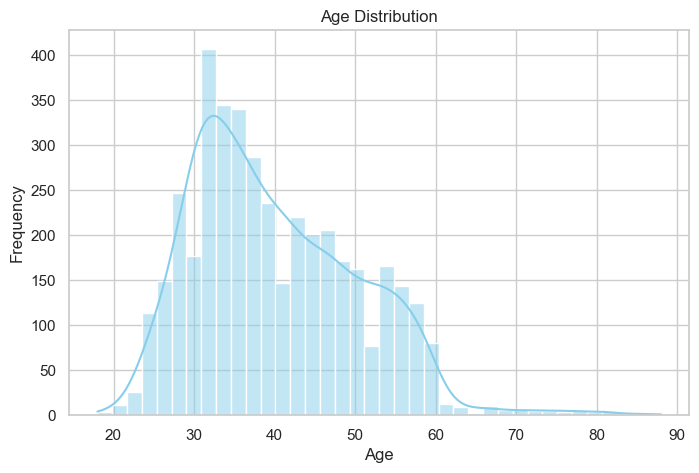

In [37]:
# Histogram for a numeric feature (e.g., 'age')
plt.figure(figsize=(8,5))
sns.histplot(df['age'], kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Countplots for Categorical Features
Visualize counts of categories for features like 'job', 'marital', 'education', etc.

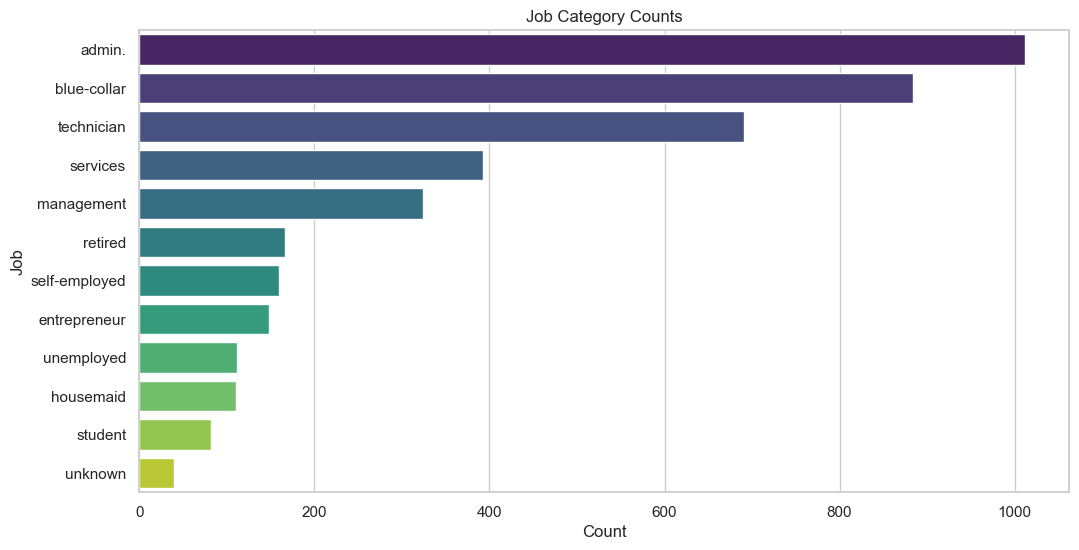

In [22]:
plt.figure(figsize=(12,6))
sns.countplot(y='job', data=df, order=df['job'].value_counts().index, palette='viridis')
plt.title('Job Category Counts')
plt.xlabel('Count')
plt.ylabel('Job')
plt.show()


Correlation Heatmap
Show correlations between numeric features to check multicollinearity.

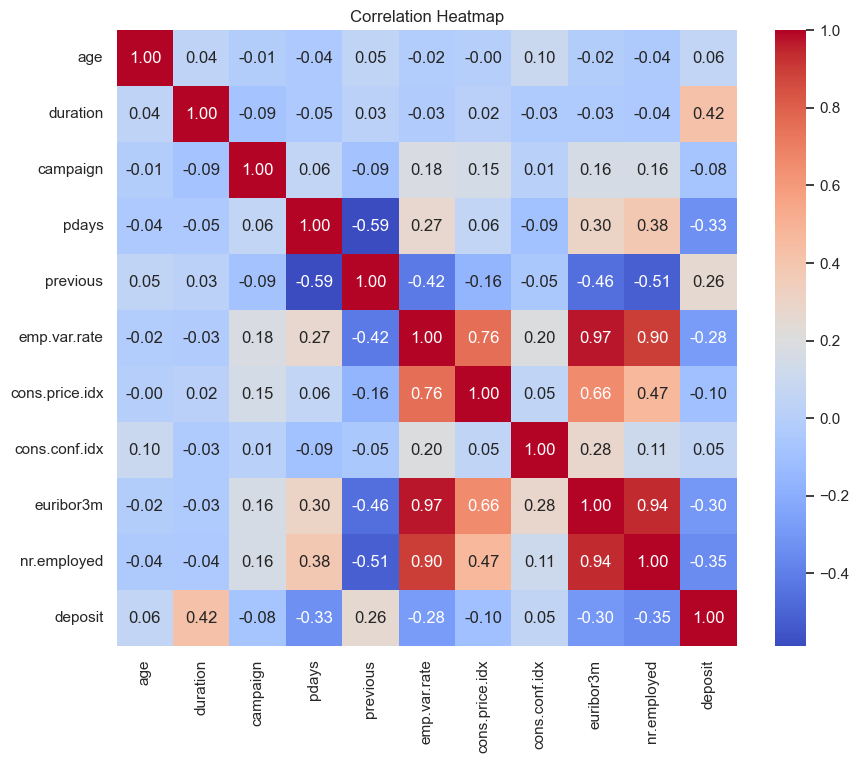

In [29]:
plt.figure(figsize=(10,8))
numeric_df = df.select_dtypes(include=['number'])  # select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


Feature Importance Bar Plot
After training the decision tree, visualize feature importance.

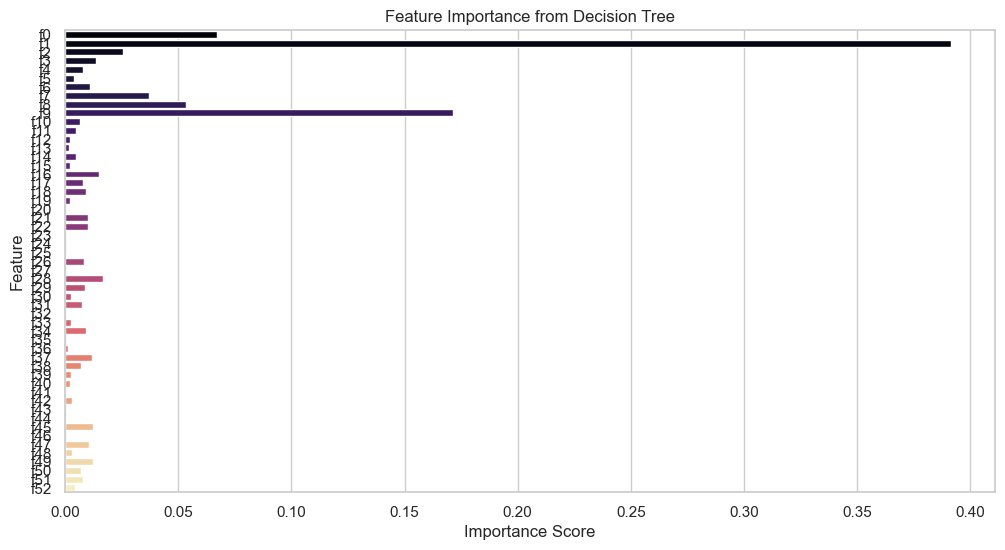

In [35]:
importances = dt_model.feature_importances_
features = X.columns

plt.figure(figsize=(12,6))
sns.barplot(x=importances, y=features, palette='magma')
plt.title('Feature Importance from Decision Tree')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


Confusion Matrix Visualization
Visualize model performance on classification.

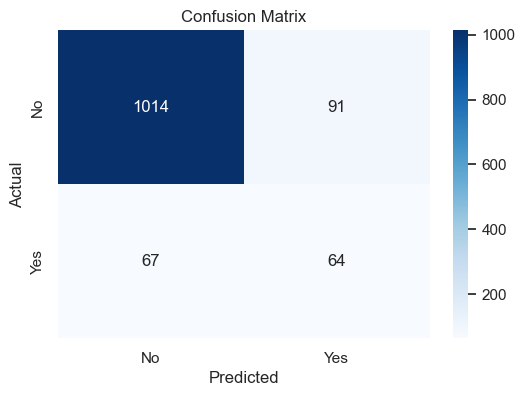

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = dt_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
